<a href="https://colab.research.google.com/github/naveenkumark1/EIP4/blob/master/Week2%5CWeek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Activation
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPool2D

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


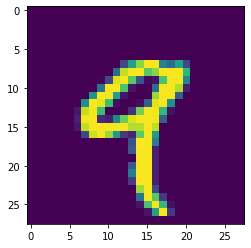

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4])

Reshape data for performing convolution operation

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [7]:
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [8]:
model1 = Sequential()

# Block 1 part 1 - 16,3,3
model1.add(Convolution2D(filters=16,kernel_size=(3,3),strides=(1,1),kernel_initializer='he_uniform',activation='relu',use_bias=False,input_shape=(28,28,1)))
model1.add(BatchNormalization())
model1.add(Dropout(0.1)) # 26,26,16
# Block 1 part 1 - 16,3,3
model1.add(Convolution2D(filters=16,kernel_size=(3,3),activation='relu',use_bias=False,kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1)) # 24*24*16

# Maxpool 
model1.add(Convolution2D(filters=10,kernel_size=(1,1),activation='relu',use_bias=False,kernel_initializer='he_uniform')) # 24*24*10
model1.add(MaxPooling2D(pool_size=(2,2))) # 12*12*10

# Block 2 part 1 - 10,3,3
model1.add(Convolution2D(filters=10,kernel_size=(3,3),activation='relu',use_bias=False,kernel_initializer='he_uniform'))
model1.add(BatchNormalization())
model1.add(Dropout(0.1)) # 10*10*10

# Block 2 part 2 - 16,3,3
model1.add(Convolution2D(filters=16,kernel_size=(3,3),activation='relu',use_bias=False,kernel_initializer='he_uniform')) 
model1.add(BatchNormalization())
model1.add(Dropout(0.1)) # 8*8*16

# Block 2 part 3 - 16,3,3
model1.add(Convolution2D(filters=16,kernel_size=(3,3),activation='relu',use_bias=False,kernel_initializer='he_uniform')) 
model1.add(BatchNormalization())
model1.add(Dropout(0.1)) # 6*6*16

# Block 2 part 4 - 16,3,3
model1.add(Convolution2D(filters=16,kernel_size=(3,3),activation='relu',use_bias=False,kernel_initializer='he_uniform')) 
model1.add(BatchNormalization())
model1.add(Dropout(0.1)) # 4*4*16

# Transition layer - 10,4,4
model1.add(Convolution2D(filters=10,kernel_size=(4,4),activation='relu',use_bias=False,kernel_initializer='he_uniform')) # 1*1*10
model1.add(BatchNormalization())
#model1.add(Dropout(0.1)) # 1*1*10

model1.add(GlobalAveragePooling2D())

#model1.add(Flatten())
model1.add(Activation('softmax'))


model1.summary()












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        2304      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0   

In [9]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 20)

model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model1.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 14s 230us/step - loss: 0.4498 - acc: 0.8983 - val_loss: 0.0860 - val_acc: 0.9831
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.002274450341167551.
60000/60000 [==============================] - 10s 170us/step - loss: 0.1179 - acc: 0.9756 - val_loss: 0.0556 - val_acc: 0.9875
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018315018317.
60000/60000 [==============================] - 10s 175us/step - loss: 0.0806 - acc: 0.9814 - val_loss: 0.0464 - val_acc: 0.9890
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586101175269.
60000/60000 [==============================] - 11s 175us/step - loss: 0.0669 - acc: 0.9834 - val_loss: 0.

In [0]:
score = model1.evaluate(X_test, Y_test, verbose=0)

In [11]:
print(score)

[0.021871725922217592, 0.9937]
